In [66]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Read csv files
csvpath1 = os.path.join('ride_data.csv')
ride_df = pd.read_csv(csvpath1)

In [67]:
ride_df.head(10)

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673
5,New Jeffrey,2016-02-22 18:36:25,36.01,9757888452346
6,Port Johnstad,2016-06-07 02:39:58,17.15,4352278259335
7,Jacobfort,2016-09-20 20:58:37,22.98,1500221409082
8,Travisville,2016-01-15 17:32:02,27.39,850152768361
9,Sandymouth,2016-11-16 07:27:00,21.61,2389035050524


In [68]:
csvpath2 = os.path.join('city_data.csv')
city_df = pd.read_csv(csvpath2)
city_df.head(5)
city_df.shape



(126, 3)

In [69]:
#remove duplicate 
city_df = city_df.drop_duplicates('city', keep = 'first')
city_df.shape


(125, 3)

In [70]:
cityride_df = pd.merge(ride_df, city_df, how = "left", on=['city', 'city'])
cityride_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [71]:
#Calculate the Total Count of City and Rides
### not the right city_count
ride_count = cityride_df["driver_count"].count()
city_count = cityride_df["city"].count
print(ride_count,city_count)

2375 <bound method Series.count of 0                   Sarabury
1                  South Roy
2                Wiseborough
3                Spencertown
4                 Nguyenbury
5                New Jeffrey
6              Port Johnstad
7                  Jacobfort
8                Travisville
9                 Sandymouth
10           New Andreamouth
11             New Christine
12               Stewartview
13            Rodriguezburgh
14          West Sydneyhaven
15               Swansonbury
16                  Lisatown
17                 East Erin
18           Port Martinberg
19               Wiseborough
20               Edwardsbury
21                 Jacobfort
22               Pamelahaven
23                Fosterside
24                 Jacobfort
25          West Sydneyhaven
26               West Alexis
27               Carrollfort
28                 New David
29               Stewartview
                ...         
2345          West Kevintown
2346             Matthewside
2347    

In [72]:
# not the right city_count
city_count1 = len(cityride_df["city"])
print(city_count1)


2375


In [73]:
### calculate the unique city name
city_count = len(cityride_df["city"].unique())
print(city_count)

125


In [74]:
#Calculate Total Fare
total_fare = cityride_df["fare"].sum()
print(total_fare)
cityride_df

63651.31


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban
5,New Jeffrey,2016-02-22 18:36:25,36.01,9757888452346,58,Urban
6,Port Johnstad,2016-06-07 02:39:58,17.15,4352278259335,22,Urban
7,Jacobfort,2016-09-20 20:58:37,22.98,1500221409082,52,Urban
8,Travisville,2016-01-15 17:32:02,27.39,850152768361,37,Urban
9,Sandymouth,2016-11-16 07:27:00,21.61,2389035050524,11,Urban


In [75]:
by_city = cityride_df.groupby('city')
ave_fare = by_city.mean()['fare']
ride_count = by_city['ride_id'].count()
driver_count = by_city.mean()['driver_count']
city_type =city_df.set_index('city')['type']

In [76]:
# Final dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": ave_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})
city_info.sort_values('Number of Drivers', ascending = False)
city_info.head(10)

,Average Fare,Number of Drivers,Number of Rides,Type of City
Alvarezhaven,23.928710,21.0,31,Urban
Alyssaberg,20.609615,67.0,26,Urban
Anitamouth,37.315556,16.0,9,Suburban
Antoniomouth,23.625000,21.0,22,Urban
Aprilchester,21.981579,49.0,19,Urban
Arnoldview,25.106452,41.0,31,Urban
Campbellport,33.711333,26.0,15,Suburban
Carrollbury,36.606000,4.0,10,Suburban
Carrollfort,25.395517,55.0,29,Urban
Clarkstad,31.051667,21.0,12,Suburban


In [77]:
#separated dfs for city categories
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']
sns.set()

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .4, linewidth=2)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .4, linewidth=2)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .4, linewidth=2)


In [79]:
plt.suptitle('Pyber Ride 2016')
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')


Text(0,0.5,'Average Fare per City')

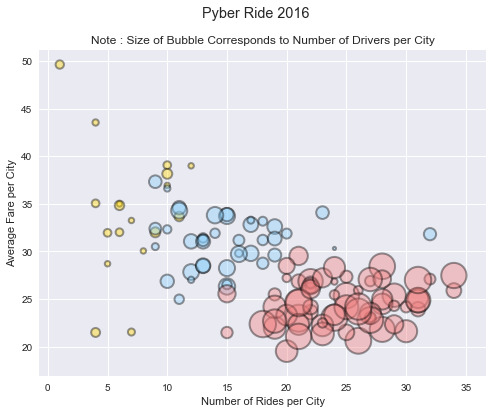

In [80]:
plt.show()